## Number Density and Cross Sections

In [968]:
Nav = 6.023*10**23
MH20 = 18.01524
n_protons = (1e6*0.99820/MH20)*2*Nav #(= protons/m^3)
n_oxygen = (1e6*0.99820/MH20)*Nav #(= protons/m^3)

def MFP(n,sigma):
    """Calculates the MFP, preferably in cm.

    Args:
        n (float): the number density in atoms/cm^3
        sigma (float): the cross section in barn (10^-24 cm^2)/atom

    Returns:
        lambda (float): The mean free path in cm, 
        this is the average distance travelled before a collision (elastic/inelastic)
    """
    return (1/(n*sigma))

# Neutron cross sections (E/I) versus energy

In [969]:
sigma_Hn_nprime = []

In [970]:
import numpy as np
import matplotlib.pyplot as plt
print(np.random.rand(100))

# fig,axes=plt.subplots(1,1,figsize=(5,5))
# axes.hist(np.random.rand(100000))

# plt.show()


[0.27783342 0.581465   0.87420051 0.52025747 0.25887612 0.78740199
 0.33705788 0.12377283 0.61698166 0.01405723 0.81394116 0.42881521
 0.2095588  0.67022712 0.65264296 0.73108431 0.31222685 0.26447801
 0.12432762 0.25725497 0.98313764 0.83418642 0.83281498 0.31933338
 0.39610536 0.34490073 0.36048763 0.14694588 0.12598472 0.55157395
 0.77441442 0.95245827 0.56754598 0.64607906 0.11182457 0.89015785
 0.52092368 0.7929053  0.90104264 0.49927157 0.35680329 0.19136098
 0.05197961 0.52930378 0.05558828 0.14982668 0.2853738  0.1508298
 0.52653383 0.65528886 0.08815065 0.67064069 0.42351846 0.59316818
 0.80571747 0.05194312 0.57791996 0.17278483 0.82510269 0.04604784
 0.02319793 0.88903062 0.19177586 0.67118852 0.51143942 0.96081481
 0.85475497 0.37244238 0.96457025 0.5819342  0.12149091 0.49610017
 0.96906433 0.71573011 0.45431932 0.0736534  0.66004523 0.60136157
 0.43602988 0.48007507 0.04978146 0.38785735 0.62825099 0.1046599
 0.30290177 0.99073607 0.52924482 0.87672607 0.6949652  0.978426

[1.00000000e-03 1.23026877e-03 1.51356125e-03 1.86208714e-03
 2.29086765e-03 2.81838293e-03 3.46736850e-03 4.26579519e-03
 5.24807460e-03 6.45654229e-03 7.94328235e-03 9.77237221e-03
 1.20226443e-02 1.47910839e-02 1.81970086e-02 2.23872114e-02
 2.75422870e-02 3.38844156e-02 4.16869383e-02 5.12861384e-02
 6.30957344e-02 7.76247117e-02 9.54992586e-02 1.17489755e-01
 1.44543977e-01 1.77827941e-01 2.18776162e-01 2.69153480e-01
 3.31131121e-01 4.07380278e-01 5.01187234e-01 6.16595002e-01
 7.58577575e-01 9.33254301e-01 1.14815362e+00 1.41253754e+00
 1.73780083e+00 2.13796209e+00 2.63026799e+00 3.23593657e+00
 3.98107171e+00 4.89778819e+00 6.02559586e+00 7.41310241e+00
 9.12010839e+00 1.12201845e+01 1.38038426e+01 1.69824365e+01
 2.08929613e+01 2.57039578e+01 3.16227766e+01 3.89045145e+01
 4.78630092e+01 5.88843655e+01 7.24435960e+01 8.91250938e+01
 1.09647820e+02 1.34896288e+02 1.65958691e+02 2.04173794e+02
 2.51188643e+02 3.09029543e+02 3.80189396e+02 4.67735141e+02
 5.75439937e+02 7.079457

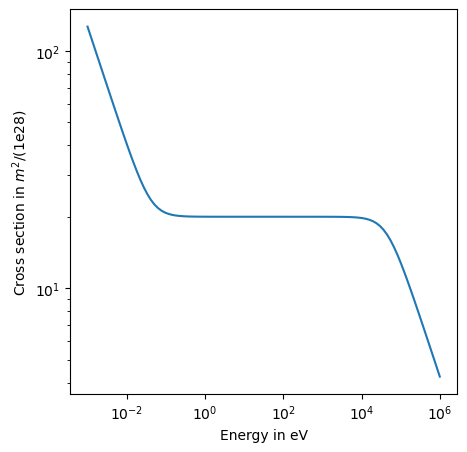

In [971]:
def cross_section_H1_SI(E,E0 = 4.5e4,ET = 0.04):
    """   Calculates the cross section of elastic neutron scattering with hydrogen atoms.
    Data from stralingshygiene book.

    Args:
        E (float): Energy of neutron in eV.
        E0 (float, optional): upperbound of the plateau. Defaults to 4.5e4.
        ET (float, optional): lower bound of the plateau, thermal energyscale, default value is kbT. Defaults to 0.04.

    Returns:
        float: cross section value. The value is in units of m^2?
    """
    sigma_plateau = 20.0 #eV
    cross_section =sigma_plateau*(E0**2/(E0**2+E**2) + ET**2/E**2)**0.25
    return cross_section/1e28

fig,axes=plt.subplots(1,1,figsize=(5,5))
x = np.logspace(-3,6,101)
print(x)
axes.plot(x, cross_section_H1(x,4.5e4,0.04))
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel("Energy in eV")
axes.set_ylabel("Cross section in $m^2$/(1e28)")
plt.show()

In [972]:
cross_section_H1(1e3)

19.99753163399731

### Collision Lab energy

In [1024]:
from numpy import linalg as LA

def unit_vector(theta,phi):
    """
    Return a unit vector with polar angles theta and phi.
    """
    a = np.cos(theta)
    b = np.sin(theta)
    c = np.cos(phi)
    d = np.sin(phi)
    return np.array([b*c, b*d, a])

def collision_lab_x(Energy):
    pmagnitude= np.sqrt(2*Energy)
    theta=(np.random.rand())*np.pi
    phi=np.random.rand()*2*np.pi

    p_lab = pmagnitude*np.array([1,0,0]) #collision in arbitrary x dimension.
    p_cm  = p_lab/2.0
    p_cm_new = LA.norm(p_cm)*unit_vector(theta,phi)
    p_lab_new = p_cm_new + p_cm
    Energy_new = LA.norm(p_lab_new)**2/2.
    return (Energy_new, theta,phi)

def collision_lab_z(Energy):
    pmagnitude= np.sqrt(2*Energy)

    theta=(np.random.rand())*np.pi
    phi=np.random.rand()*2*np.pi

    p_lab = pmagnitude*np.array([0,0,1]) #collision in arbitrary x dimension.
    p_cm  = p_lab
    p_cm_new = LA.norm(p_cm)*unit_vector(theta,phi)
    p_lab_new = p_cm_new + p_cm
    Energy_new = LA.norm(p_lab_new)**2/2.
    return (Energy_new, theta,phi)

def collision_lab_y(Energy):
    pmagnitude= np.sqrt(2*Energy)

    theta=(np.random.rand())*np.pi
    phi=np.random.rand()*2*np.pi

    p_lab = pmagnitude*np.array([0,1,0]) #collision in arbitrary x dimension.
    p_cm  = p_lab/2.0
    p_cm_new = LA.norm(p_cm)*unit_vector(theta,phi)
    p_lab_new = p_cm_new + p_cm
    Energy_new = LA.norm(p_lab_new)**2/2.
    return (Energy_new, theta,phi)
v  = (unit_vector(np.random.rand(),np.random.rand()))
print(LA.norm(v))


1.0


In [1068]:
E0 = 0.5
# alpha,beta,gamma = unit_vector(np.random.rand(),np.random.rand())



def collision_lab_random(pinitial):
    p_i = pinitial
    p_i_cm = p_i/2.0

    theta=(np.random.rand())*np.pi
    phi=np.random.rand()*2*np.pi
    p_i_cm_new = LA.norm(p_i_cm)*unit_vector(theta,phi)
    p_i_lab_new = p_i_cm_new + p_i_cm

    return(p_i_lab_new)

# theta=(np.random.rand())*np.pi
# phi=np.random.rand()*2*np.pi
# Pvoor = np.sqrt(2*E0)*unit_vector(theta,phi)

# E = []
# pxlist,pylist = [],[]
# for i in range(10000):
#     px,py,pz = collision_lab_random(Pvoor)
#     E.append((px**2+py**2+pz**2)/2.)
#     pxlist.append(px)
#     pylist.append(py)
# print(np.mean(E)/E0)
# # \
# fig,axes=plt.subplots(1,1,figsize=(5,5))
# axes.scatter(pxlist,pylist)
# plt.show()

# print(px)

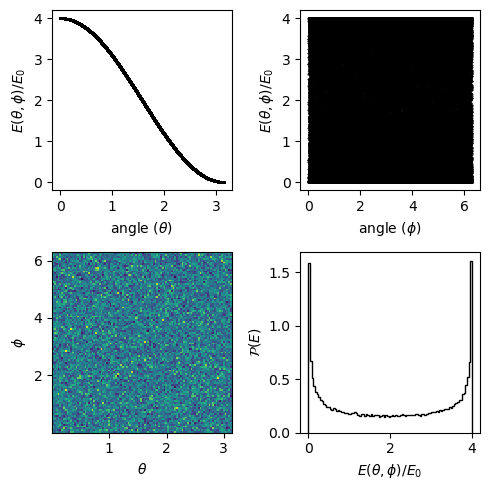

In [974]:
Elist,thetalist,philist= [],[],[]
E0 = 1e6
for i in range(100000):
    Energy,theta,phi = collision_lab_random(E0)
    Elist.append(Energy/E0)
    thetalist.append(theta)
    philist.append(phi)
# plt.hist(Elist,bins=100,density = True)
# plt.hist(thetalist)
# plt.hist(philist)
# print(np.mean(Elist)/E0,np.max(Elist)/E0,min(Elist)/E0)

fig,axes=plt.subplots(2,2,figsize=(5,5))
axes[0][0].scatter(thetalist,Elist,s = .2,color='black')
axes[0][0].set_ylabel(r"$E(\theta,\phi)/E_0$")
axes[0][0].set_xlabel(r"angle $(\theta)$")

axes[0][1].scatter(philist,Elist,s = .2,color='black')
axes[0][1].set_ylabel(r"$E(\theta,\phi)/E_0$")
axes[0][1].set_xlabel(r"angle $(\phi)$")

axes[1][0].hist2d(thetalist,philist,bins=100,density =True)
axes[1][0].set_ylabel(r"$\phi$")
axes[1][0].set_xlabel(r"$\theta$")

axes[1][1].hist(Elist,bins=100, density = True,histtype="step",color='black')
axes[1][1].set_xlabel(r"$E(\theta,\phi)/E_0$")
axes[1][1].set_ylabel(r"$\mathcal{P}(E)$")

plt.tight_layout()

In [975]:

theta=(np.random.rand())*np.pi
phi=np.random.rand()*2*np.pi

Pvoor = np.sqrt(2*E0)*unit_vector(theta,phi)

def collision_lab_random(pinitial):
    p_i = pinitial
    p_i_cm = p_i/2.0

    theta=(np.random.rand())*np.pi
    phi=np.random.rand()*2*np.pi
    p_i_cm_new = LA.norm(p_i_cm)*unit_vector(theta,phi)
    p_i_lab_new = p_i_cm_new + p_i_cm

    return(p_i_lab_new)


def multiple_collision(E0,n):
    i = 1
    Elist = [E0]
    collision_number= [0]
    while i <n:
        E0,theta,phik = collision_lab_z(E0)
        Elist.append(E0)
        collision_number.append(i)
        i += 1
    return Elist, collision_number



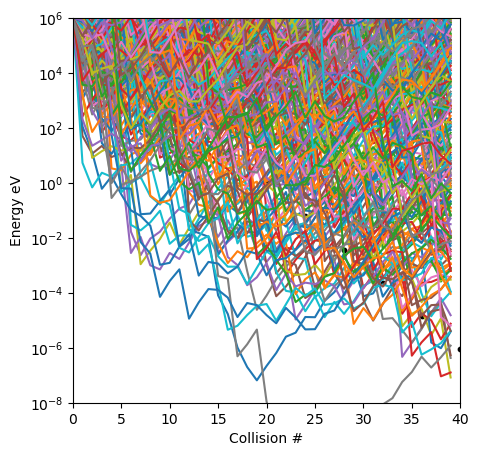

In [976]:
Emean = []
for k in range(500000):
    Elist, collision_number = multiple_collision(1e6,40)
    Emean.append(Elist)


fig,axes=plt.subplots(1,1,figsize=(5,5))

for i in range(500):
    axes.plot(collision_number,Emean[i])    
axes.plot(collision_number,np.mean(Emean,axis=0),lw=2,color='black')    

axes.set_yscale('log')
axes.set_ylabel('Energy eV')
axes.set_xlabel('Collision #')
axes.set_ylim(1e-8,1e6)
axes.set_xlim(0,40)
axes.scatter(np.linspace(0,40,11),1e6/2**np.linspace(0,40,11),s= 10,color='black')
# axes.scatter(15,1e6/2**15,s= 10,color='black')
plt.show()

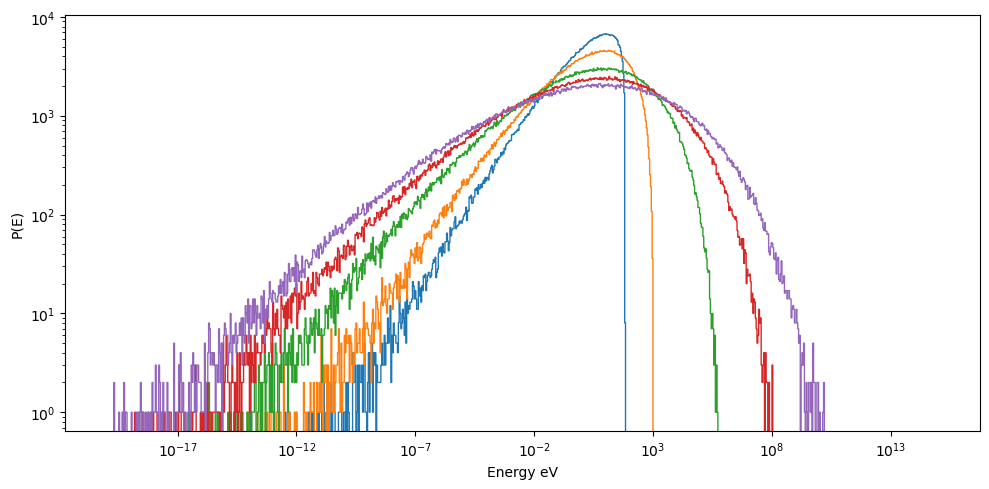

In [981]:
E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15,E16,E17,E18,E19,E20 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
for i in range(len(Emean)):
    E1.append(Emean[i][1])
    E2.append(Emean[i][2])
    E3.append(Emean[i][3])
    E4.append(Emean[i][4])
    E5.append(Emean[i][5])
    E6.append(Emean[i][6])
    E7.append(Emean[i][7])
    E8.append(Emean[i][8])
    E9.append(Emean[i][9])
    E10.append(Emean[i][10])
    E11.append(Emean[i][11])
    E12.append(Emean[i][12])
    E13.append(Emean[i][13])
    E14.append(Emean[i][14])
    E15.append(Emean[i][15])
    E16.append(Emean[i][16])
    E17.append(Emean[i][17])
    E18.append(Emean[i][18])
    E19.append(Emean[i][19])
    E20.append(Emean[i][20])
E0=1e6
fig,axes=plt.subplots(1,1,figsize=(10,5))
# axes.hist(E_5,bins=100,density=True,color='black',histtype='step')

# axes.hist(E_10,bins=51,density=True,color='orange',histtype='step')

# axes.hist(E1,bins=np.logspace(-8,8,501),density=False,color='dodgerblue',histtype='step')
# axes.hist(E2,bins=np.logspace(-8,8,501),density=False,color='orange',histtype='step')

axes.hist(np.array(E3)/E0,bins=np.logspace(-20,15,1001),density=False,histtype='step')
axes.hist(np.array(E5)/E0,bins=np.logspace(-20,15,1001),density=False,histtype='step')
axes.hist(np.array(E10)/E0,bins=np.logspace(-20,15,1001),density=False,histtype='step')
axes.hist(np.array(E15)/E0,bins=np.logspace(-20,15,1001),density=False,histtype='step')
axes.hist(np.array(E20)/E0,bins=np.logspace(-20,15,1001),density=False,histtype='step')
axes.set_xscale('log')
axes.set_yscale('log')

# axes.vlines(1e6/2**5,1e-6,1e4)
# axes.vlines(1e6/2**10,1e-6,1e4)
# axes.vlines(1e6/2**15,1e-6,1e4)

# axes.set_xlim(1e-20,1)
axes.set_xlabel("Energy eV")
axes.set_ylabel("P(E)")
plt.tight_layout()
plt.show()

In [978]:
print(np.sort(E1))

[4.43835665e-07 1.12611769e-06 5.96540068e-05 ... 1.00000000e+06
 1.00000000e+06 1.00000000e+06]


In [910]:
(1e6/np.mean(E_10))
# (1e6/np.mean(E_10))
# (1e6/np.mean(E_15))

512.1135452852345

In [ ]:
ET = 0.04
pxlist,pylist,pzlist = [],[],[]
for j in range(1000):
    pnew_magnitude = 1e6
    i = 0

    px,py,pz = [pnew_magnitude],[0],[0]
    while pnew_magnitude >ET:
        pnew = collision_lab(pnew_magnitude)
        pnew_magnitude = LA.norm(pnew)
        px.append(pnew[0])
        py.append(pnew[1])
        pz.append(pnew[2])
        i += 1
        # print(pnew)
    pxlist.append(px)
    pylist.append(py)
    pzlist.append(pz)

# for i in range(30):
total_p = [pxlist[i][0:30] for i in range(0,54)]
mean_p = np.mean(total_p,axis=0)
print(len(mean_p),mean_p)

In [ ]:

fig,axes=plt.subplots(2,2,figsize=(10,10))
for i in range(len(pxlist)):
    axes[0][0].plot(pxlist[i],pylist[i])
    axes[1][0].plot(np.sqrt(np.array(pxlist[i])**2+np.array(pylist[i])**2+np.array(pzlist[i])**2))

    axes[0][1].plot(pxlist[i],pzlist[i])
    axes[1][1].plot(pylist[i],pzlist[i])

# axes[0].plot(np.mean(pxlist),np.mean(pylist))
# axes[1].plot(np.mean(np.sqrt(np.array(pxlist)**2+np.array(pylist)**2)))
axes[1][0].plot(mean_p,color='black',lw=4)
axes[0][0].set_xlim(-1e6,1e6)
axes[0][0].set_ylim(-1e6,1e6)
axes[0][0].set_xlabel('px')
axes[0][0].set_ylabel('py')

axes[0][1].set_xlim(-1e6,1e6)
axes[0][1].set_ylim(-1e6,1e6)
axes[0][1].set_xlabel('px')
axes[0][1].set_ylabel('pz')

axes[1][1].set_xlim(-1e6,1e6)
axes[1][1].set_ylim(-1e6,1e6)
axes[1][1].set_xlabel('py')
axes[1][1].set_ylabel('pz')

axes[1][0].set_xlabel('Step')
axes[1][0].set_ylabel('|p|')
axes[1][0].set_yscale('log')

# for i in range(len(pxlist)):
plt.tight_layout()
